In [11]:
import numpy as np
import scanpy as sc
import scprep
import matplotlib.pyplot as plt
import phate
import plotly3d.plot as p3
from sklearn.cluster import KMeans

In [2]:
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

In [3]:
phate_op = phate.PHATE(n_jobs=-1, n_components=3)
X_phate = phate_op.fit_transform(adata.X)

Calculating PHATE...
  Running PHATE on 16985 observations and 21465 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 92.08 seconds.
    Calculating KNN search...
    Calculated KNN search in 42.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.49 seconds.
  Calculated graph and diffusion operator in 134.62 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.57 seconds.
    Calculating KMeans...
    Calculated KMeans in 10.50 seconds.
  Calculated landmark operator in 13.51 seconds.
  Calculating optimal t...
    Automatically selected t = 27
  Calculated optimal t in 4.33 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.68 seconds.
  Calculating metric MDS...


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 82.37 seconds.
Calculated PHATE in 236.53 seconds.


In [6]:
p3.scatter(X_phate, adata.obs['day'], filename='../plots/phate3d.html')

In [16]:
adata.obsm['X_phate3d'] = X_phate

In [17]:
adata_last = adata[adata.obs['day'] == 30]

In [9]:
phate_op2 = phate.PHATE(n_jobs=-1, n_components=3)
X_phate2 = phate_op2.fit_transform(adata_last.obsm['X_phate'])

Calculating PHATE...
  Running PHATE on 2971 observations and 2 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.16 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.18 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.39 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.65 seconds.
  Calculated landmark operator in 5.17 seconds.
  Calculating optimal t...
    Automatically selected t = 33
  Calculated optimal t in 4.71 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.23 seconds.
  Calculating metric MDS...


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



  Calculated metric MDS in 41.13 seconds.
Calculated PHATE in 52.43 seconds.


In [10]:
p3.scatter(X_phate2, adata_last.obs['day'], filename='../plots/phate3d_endpt.html')

In [18]:
adata_last.obsm['X_phate3d_zoom'] = X_phate2

/tmp/ipykernel_2824791/4004550316.py:1: ImplicitModificationWarning:

Setting element `.obsm['X_phate3d_zoom']` of view, initializing view as actual.



<Axes: >

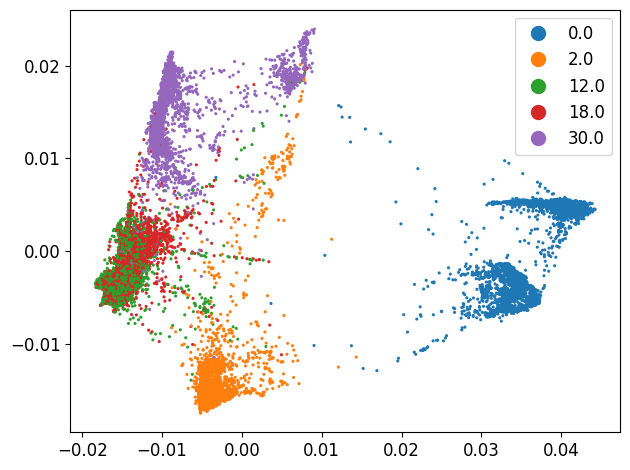

In [13]:
scprep.plot.scatter2d(adata.obsm['X_phate'], adata.obs['day'])


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



<Axes: >

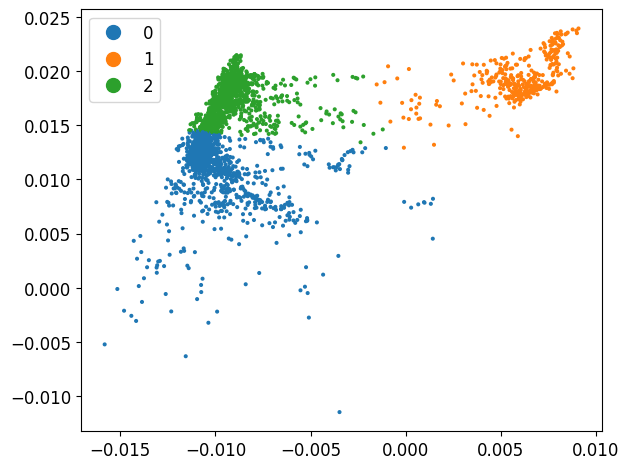

In [20]:
km = KMeans(n_clusters=3)
km.fit(adata[adata.obs['day'] == 30].obsm['X_phate'])
adata_last.obs['km_clusters'] = km.labels_
scprep.plot.scatter2d(adata_last.obsm['X_phate'], adata_last.obs['km_clusters'])

In [22]:
p3.scatter(adata_last.obsm['X_phate3d'], adata_last.obs['km_clusters'], filename='../plots/last_clusters.html')

In [23]:
p3.scatter(adata_last.obsm['X_phate3d_zoom'], adata_last.obs['km_clusters'], filename='../plots/km_clusters_zoomed_in.html')
